# Mass shootings and Gun Control Debate: How mass shootings polarize gun control debate in the US

Authors: Lina Pedraza, Evelyn Sanchez, Camila Carrasco


## Texas Shooting effects on social media and financial markets

![Image of Shooting](http://cdn.cnn.com/cnnnext/dam/assets/171105195442-12-sutherland-springs-church-shooting-super-169.jpg)
Source: [CNN](http://www.cnn.com/2017/11/05/us/gallery/sutherland-springs-church-shooting/index.html)

A gunman with a military-style rifle opened fire on parishioners at a Sunday service at a small Baptist church in Sutherland Spring, Texas on November 5, 2017. The man, identified as Devin Patrick Kelley (26 years),  killed 26 people. 

Unfortunately, this is not a rare event. During 2017, the US reached 307 mass shooting (mass shooting defined as a single incident in which four or more people, not including the shooter, are "shot and/or killed" at "the same general time and location.") [Gun Violence Archive](http://www.gunviolencearchive.org)

![Image of Shooting](http://static3.businessinsider.com/image/5a00b43958a0c1184d8b643b-1201/bi-graphicsdeadliest%20mass%20shootings%20us%201.png)

# PART 1: Analysis over Tweets on 2nd Amendment and Gun Control

*DATA SOURCE*: we used [Twitter Streaming API](https://developer.twitter.com/en/docs/tweets/filter-realtime/overview.html) to filter tweets in real time related to 2 keywords: **"2nd amendment" + "Second amendment"**. The query was active from Nov 1st, 2017 to Nov 7th, 2017.

As a result of this search, we obtained a JSON file with the stream of tweets. We then converted this json file from the Streaming API of Twitter to a Pandas Dataframe with the columns that we want:
- **text**: The actual UTF-8 text of the status update.
- **id**: The integer representation of the unique identifier for this Tweet.
- **created_at**: UTC time when this Tweet was created.
- **screen_name**: The screen name, handle, or alias that this user identifies themselves with.
- **followers_count**: The number of followers this account currently has
- **friends_count**: The number of users this account is following (AKA their “followings”).
- **favorite_count**: Indicates approximately how many times this Tweet has been liked by Twitter users
- **lang**: When present, indicates a BCP 47 language identifier corresponding to the machine

For more information, see [Tweet data dictionaries](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object)

In [1]:
import json, re
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pytz
import datetime

tweets=[]
for line in open("twitter_stream_2a_sutherland.json"):

    s = line.replace(", \n", "").replace("rel=\"nofollow\"", "")
    s = re.sub(r"href=\"([a-z:\\/\.]*)\"", r"href='\1'", s)
    j = json.loads(s)

    if 'user' in j and 'text' in j:
        loc = "None"
        if j['place']: 
            loc = j['place']['full_name']
        elif j['user']['location']: 
            loc = j['user']['location']
   
    tweets.append([j['text'], j['id'], j['created_at'], j['user']['screen_name'],j['user']['followers_count'],j['user']['friends_count'],j['favorite_count'], j['user']['lang'],loc])


In [2]:
gundata=pd.DataFrame(data=tweets, 
                     columns=['tweet','id','date','screen_name','followers_count','followings_count', 'likes','language','location'])

In [3]:
#Total number of tweets during the seven days 
len(gundata)

166160

We have a very large database of **166,160** tweets.

In [4]:
#Unique number of tweets (this count, the original tweet and the first RT of that tweet
gundata['tweet'].nunique()

40726

Nevertheless, the unique number of tweets about the 2nd Amendment (original tweet and first retweet) is **40,726**.

Then, we specify the **date as index**, and we convert it from UTC (that's the default for Twitter) to Central Time.  The shooting in Sutherland Springs, Texas occurred around 11:30 a.m. local time (Central Time) on Sunday, Nov 5, 2017.

In [5]:
#Tranform date from a string to a datetime variable
from datetime import datetime
import re
gundata['date'] = pd.to_datetime(gundata['date'])
#Create two new columns, one for date and one for time
gundata['Time'], gundata['Date']= gundata['date'].apply(lambda x:x.time()), gundata['date'].apply(lambda x:x.date())
#Set Date as index of the dataframe and convert from UTC to Central Time
gundata.set_index(gundata["date"], inplace = True)
gundata.set_index(gundata.index.tz_localize("UTC").tz_convert("US/Central"), inplace = True)

### The number of tweets about 2nd Amendment per day (Nov 1st to 7th, 2017)

Grouping the number of tweets per day, starting from Nov 1st to Nov 7th, we can see a substantial increase in the number after Nov. 5th, the day of the shooting, reaching a peak of **104,259** tweets on Nov. 6th. 

Two days after the shooting the number of tweets reduced to **39,239**.

In [6]:
#Group and count the number of tweets per day
gundata.groupby('Date').count()

,tweet,id,date,screen_name,followers_count,followings_count,likes,language,location,Time
Date,,,,,,,,,,
2017-11-01,2410,2410,2410,2410,2410,2410,2410,2410,2410,2410
2017-11-02,3778,3778,3778,3778,3778,3778,3778,3778,3778,3778
2017-11-03,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
2017-11-04,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177
2017-11-05,12277,12277,12277,12277,12277,12277,12277,12277,12277,12277
2017-11-06,104259,104259,104259,104259,104259,104259,104259,104259,104259,104259
2017-11-07,39238,39238,39238,39238,39238,39238,39238,39238,39238,39238


### Graph of the number of tweets per hour per day

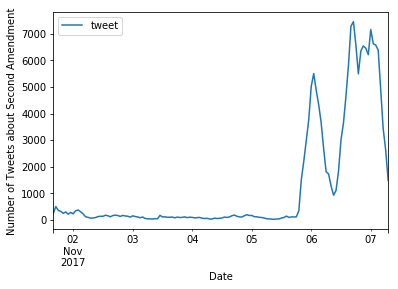

In [7]:
#Graph the number of tweets per hour per day 
%matplotlib inline
df_time = gundata.set_index('date').resample('1H').count()
plot=df_time.plot(y='tweet')
plot.set_ylabel("Number of Tweets about Second Amendment")
plot.set_xlabel("Date")

## Wow!! social media went crazy after the shooting.


Plotting the distribution of tweets per day and hour, we can observe a first peak on Nov. 5th after the shooting time
### The red line indicates the time of the shooting (around 11:20)
The number of tweets increased from the morning of Nov. 6th and had several peaks during the day and got a progressive decreased through the 7th of Nov. 

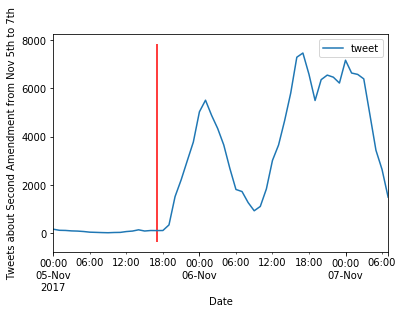

In [8]:
#Create a mask for Nov. 5 to 7  and save as dataframe
maskWeekend = (gundata['date'] > '2017-11-5') & (gundata['date'] <= '2017-11-8')
tweetsperDayWknd = gundata.loc[maskWeekend]
#Create a plot of the weekend
df_weekend = tweetsperDayWknd.set_index('date').resample('1H').count()
weekend= df_weekend.plot(y='tweet')
weekend.set_ylabel("Tweets about Second Amendment from Nov 5th to 7th")
weekend.set_xlabel("Date")
ymin, ymax = weekend.get_ylim()
weekend.vlines(x='2017-11-05 17:30:00', ymin=ymin, ymax=ymax,  color='r')

# Analysis of the most active users: Top 10 users

First we analyze the 10 users with the highest number of tweets, listed in the table below. Observing the tweets, we identify that five users: FirstFire2008, Big_Purple_One, Dwane_1, ljturner927 and north_dewayne, tweeted several times just two different texts in support of the National Riffle Association (NRA):

#### 1)	 “We all need to fight for our 2nd Amendment rights! Join me by becoming a member of the National Rifle Association: https://t.co/mwyhHHv1NE” 
##### 2)	 “Help the NRA stand for our 2nd Amendment Rights! Download the official NRA app: https://t.co/1JjH2rAVpv and give me credit: 5ZAZZ”. 

These tweets were tweeted with small variations, like randomly omitting some letters from a word or minior redaction changes.

Regarding the rest of the top 10 users, four of them tweeted messages defending the Second Amendment or Trump’s Government. In the case of the user BonzerWolf, it tweeted the same pro weapon message 64 times.

This might indicate that some of these accounts are not created for real users to express their opiniosn, but as fake accounts dedicated to promote the Second Amendment.

In [9]:
#Identify the user that tweet the most
gundata['screen_name'].nunique()
gundata.groupby('screen_name').count().sort_values('id', ascending= False).head(10)

,tweet,id,date,followers_count,followings_count,likes,language,location,Time,Date
screen_name,,,,,,,,,,
FirstFire2008,150,150,150,150,150,150,150,150,150,150
Big_Purple_One,142,142,142,142,142,142,142,142,142,142
2AAmericaNews,134,134,134,134,134,134,134,134,134,134
Protecting2nd,133,133,133,133,133,133,133,133,133,133
Dwane_1,105,105,105,105,105,105,105,105,105,105
ljturner927,96,96,96,96,96,96,96,96,96,96
The2ndA,91,91,91,91,91,91,91,91,91,91
north_dewayne,88,88,88,88,88,88,88,88,88,88
BonzerWolf,64,64,64,64,64,64,64,64,64,64


## 1st  most active user : @FirstFire2008. 
Tweeted 150 times the same two tweets supporting the National Rifle Association (NRA). **Real user??**

<img src="Fire.png" alt="Drawing" style="width: 700px;"/>

In [11]:
#Count the number of tweets made by FirstFire2008
FirstFireUser = gundata[gundata['screen_name'] == "FirstFire2008"]
FirstFireUser.groupby('tweet').count().sort_values('id', ascending= False).head(5)

,id,date,screen_name,followers_count,followings_count,likes,language,location,Time,Date
tweet,,,,,,,,,,
We all need to fight for our 2nd Amendment rights! Join me by becoming a member of the National Rifle Association: https://t.co/mwyhHHv1NE,6,6,6,6,6,6,6,6,6,6
Help the NRA stand for our 2nd Amendment Rights! Download the officia NRA app: https://t.co/1JjH2rAVpv and give me credit: 5ZAZZ,6,6,6,6,6,6,6,6,6,6
Help the NRA stand for our 2nd Amendment Rights! Download the offici NRA app: https://t.co/1JjH2rAVpv and give me credit: 5ZAZZ,6,6,6,6,6,6,6,6,6,6
Help the NRA stand for our 2nd Amendment Rights! Download the offi NRA app: https://t.co/1JjH2rAVpv and give me credit: 5ZAZZ,6,6,6,6,6,6,6,6,6,6
Help the NRA stand for our 2nd Amendment Rights! Download the off NRA app: https://t.co/1JjH2rAVpv and give me credit: 5ZAZZ,6,6,6,6,6,6,6,6,6,6


## 2nd most active user:  @Big_Purple_One
Tweeted 142 times the same two messages supporting the National Rifle Association. **Real user??**

https://twitter.com/Big_Purple_One
<img src="BigPurple.png" alt="Drawing" style="width: 700px;"/>

In [12]:
#Count the number of tweets made by 2) Big_Purple_One
Big_Purple_One = gundata[gundata['screen_name'] == "Big_Purple_One"]
Big_Purple_One.groupby('tweet').count().sort_values('id', ascending= False).head(5)

,id,date,screen_name,followers_count,followings_count,likes,language,location,Time,Date
tweet,,,,,,,,,,
Help the NRA stand for our 2nd Amendment Rights! Download the official NRA app: https://t.co/o4i9IcuQ9I and give credit: 4V4GX,6,6,6,6,6,6,6,6,6,6
We all need to fight for 2nd Amendment rights! Join me by becoming a member of the National Rifle Association: https://t.co/LEvHU7ebku,6,6,6,6,6,6,6,6,6,6
Help the NRA stand for our 2nd Amendment Rights! Download the NRA app: https://t.co/o4i9IcuQ9I and give me credit: 4V4GX,6,6,6,6,6,6,6,6,6,6
Help the NRA stand for 2nd Amendment Rights! Download the official NRA app: https://t.co/o4i9IcuQ9I and give me credit: 4V4GX,6,6,6,6,6,6,6,6,6,6
We all need to fight for our 2nd Amendment rights! Join me by becoming a member of the National Rifle Association: https://t.co/LEvHU7ebku,6,6,6,6,6,6,6,6,6,6


## 3rd most active user:  @2AAmericaNews
Tweeted 134 times news pro 2nd Amendment

https://twitter.com/2aamericanews/
<img src="2AA.png" alt="Drawing" style="width: 700px;"/>

In [13]:
#Count the number of tweets made by AAmericaNews
AAmericaNews = gundata[gundata['screen_name'] == "2AAmericaNews"]
AAmericaNews.groupby('tweet').count().sort_values('id', ascending= False).head(5)

,id,date,screen_name,followers_count,followings_count,likes,language,location,Time,Date
tweet,,,,,,,,,,
2ND AMENDMENT COLLECTION https://t.co/yYNNqyykEW,1,1,1,1,1,1,1,1,1,1
Pro 2nd amendment essay https://t.co/bZPOGFt7vn,1,1,1,1,1,1,1,1,1,1
Shooting was stopped by private citizen exercising 2nd amendment rights https://t.co/AY4PKFKo7H,1,1,1,1,1,1,1,1,1,1
Ship or Transfer FS Second Amendment Brass Ring https://t.co/KbYI2k9sxb,1,1,1,1,1,1,1,1,1,1
Selling some 2nd Amendment https://t.co/9XVUY0zQp2,1,1,1,1,1,1,1,1,1,1


## 4th most active user:@Protecting2nd
Tweeted 133 times news about 2nd Amendment
https://twitter.com/protecting2nd
<img src="Preotecting2nd.png" alt="Drawing" style="width: 800px;"/>

In [14]:
#Count the number of tweets made by Protecting2nd
Protecting2nd= gundata[gundata['screen_name'] == "Protecting2nd"]
Protecting2nd.groupby('tweet').count().sort_values('id', ascending= False).head(5)

,id,date,screen_name,followers_count,followings_count,likes,language,location,Time,Date
tweet,,,,,,,,,,
15 Year Old Swedish Nationalist Arrested And Taken From His Family For Reeducation - https://t.co/7EQBJAvtO3,1,1,1,1,1,1,1,1,1,1
Must Watch Report: MSM Desperate To Cover Up ANTIFA's Plans For A Violent Uprising November 4th - https://t.co/H9J5VU13tB,1,1,1,1,1,1,1,1,1,1
Revolution: History Vs Reality - https://t.co/1QCyd45m6z,1,1,1,1,1,1,1,1,1,1
Revelation Of The Beast Revealed - https://t.co/TO8HhGZLuh,1,1,1,1,1,1,1,1,1,1
Resurfaced Video Shows Hillary's Super Delegate Plotting Election Theft From Bernie - https://t.co/kO3ZEeyWuK,1,1,1,1,1,1,1,1,1,1


## 5th most active user: @Dwane_1 
Tweeted 105 times the same  two messages supporting the National Rifle Association. **User not longer found in Twitter**

In [15]:
#Count the number of tweets made by Dwane_1
dawne = gundata[gundata['screen_name'] == "Dwane_1"]
dawne.groupby('tweet').count().sort_values('id', ascending= False).head(5)

,id,date,screen_name,followers_count,followings_count,likes,language,location,Time,Date
tweet,,,,,,,,,,
We all need to fight for our 2nd Amendment rights! Join me by becoming a member of the National Rifle Association: https://t.co/Z8Ifvvzyzd,7,7,7,7,7,7,7,7,7,7
Help the NRA stand for our 2nd Amendment Rights! Download the official NRA app: https://t.co/5QnpgH9mO9 and give me credit: 27MLVj,6,6,6,6,6,6,6,6,6,6
Help the NRA stand for our 2nd Amendment Rights! Download the official NRA app: https://t.co/5QnpgH9mO9 and give me credit: 27MLVk,6,6,6,6,6,6,6,6,6,6
Help the NRA stand for our 2nd Amendment Rights! Download the official NRA app: https://t.co/5QnpgH9mO9 and give me credit: 27MLV,6,6,6,6,6,6,6,6,6,6
Help the NRA stand for our 2nd Amendment Rights! Download the official NRA app: https://t.co/5QnpgH9mO9 and give me credit: 27MLVa,6,6,6,6,6,6,6,6,6,6


## 6th most active user:  @ljturner927
Tweeted 96 times the same two messages supporting the National Rifle Association. ***User not longer found in twitter***

In [16]:
#Count the number of tweets made by ljturner927
ljturner927 = gundata[gundata['screen_name'] == "ljturner927"]
ljturner927.groupby('tweet').count().sort_values('id', ascending= False).head(5)

,id,date,screen_name,followers_count,followings_count,likes,language,location,Time,Date
tweet,,,,,,,,,,
Help the NRA stand for our 2nd Amendment Rights! Download the official NRA app: https://t.co/YDimIvFlzs and give me credit: GZR8V,88,88,88,88,88,88,88,88,88,88
We all need to fight for our 2nd Amendment rights! Join me by becoming a member of the National Rifle Association: https://t.co/S7rlBVlV2D,6,6,6,6,6,6,6,6,6,6
Help the NRA stand for our 2nd Amendment Rights! Download the official NRA app: https://t.co/YDimIvnKaS and give me credit: GZR8V,2,2,2,2,2,2,2,2,2,2


## 7th most active user: @Protecting2nd 
Tweeted  91 times pro Second amendment news. Many of this tweets contains the hashtag #GoodGuywithAGun, in reference of the civilan that shoot twice  Texas' gunman as he exited  Sutherland Springs church

https://twitter.com/the2nda?lang=en
<img src="The2ndA.png" alt="Drawing" style="width: 800px;"/>

In [17]:
#Count the number of tweets made by The2ndA
The2nd= gundata[gundata['screen_name'] == "The2ndA"]
The2nd.groupby('tweet').count().sort_values('id', ascending= False).head(5)

,id,date,screen_name,followers_count,followings_count,likes,language,location,Time,Date
tweet,,,,,,,,,,
@ReneeCarrollPhx My latest Newsmax piece.\nPlease share it. We need this message to get out!\n\nhttps://t.co/YjYEAwy57i,2,2,2,2,2,2,2,2,2,2
RT @RightWingAngel: Please read and share by our own @The2ndA : Don't Disarm the Potential Heroes Who Can Stop the Bad Guys https://t.co/m…,2,2,2,2,2,2,2,2,2,2
"""Tomorrow is Election Day""\nRT to spread this message!!\nA #GoodGuywithAGun can save lives! #TexasChurchMassacre \n\nhttps://t.co/YjYEAwy57i",1,1,1,1,1,1,1,1,1,1
@USAloveGOD @realDonaldTrump Please RT! We need to spread this message\nA #GoodGuywithAGun can save lives!… https://t.co/rJNbblGk6i,1,1,1,1,1,1,1,1,1,1
@dbongino Can you read this and share this with your followers? Trying to get this message out...\n\nhttps://t.co/YjYEAwy57i,1,1,1,1,1,1,1,1,1,1


## 8h most active user: @north_dewayne. 
Tweeted 91 times the same two messages supporting the National Rifle Association. **Real user??**

In [18]:
#Analyze tweeets of the most active users: 8) north_dewayne
north_dewayne= gundata[gundata['screen_name'] == "north_dewayne"]
north_dewayne['tweet'].nunique()
north_dewayne.groupby('tweet').count().sort_values('id', ascending= False).head(5)

,id,date,screen_name,followers_count,followings_count,likes,language,location,Time,Date
tweet,,,,,,,,,,
Help the NRA stand for our 2nd Amendment Rights! Download the official NRA app: https://t.co/qPdRO35W1a and give me credit: DQ9JA...........,6,6,6,6,6,6,6,6,6,6
Help the NRA stand for our 2nd Amendment Rights! Download the official NRA app: https://t.co/qPdRO35W1a and give me credit: DQ9JA.......,6,6,6,6,6,6,6,6,6,6
Help the NRA stand for our 2nd Amendment Rights! Download the official NRA app: https://t.co/qPdRO35W1a and give me credit: DQ9JA.,6,6,6,6,6,6,6,6,6,6
Help the NRA stand for our 2nd Amendment Rights! Download the official NRA app: https://t.co/qPdRO35W1a and give me credit: DQ9JA..,5,5,5,5,5,5,5,5,5,5
Help the NRA stand for our 2nd Amendment Rights! Download the official NRA app: https://t.co/qPdRO35W1a and give me credit: DQ9JA.....,5,5,5,5,5,5,5,5,5,5


## 9th most active user: @BonzerWolf 
Tweeted  64 times the following message:*"It was a good citizen with a gun who shot the bad guy with a gun and saved more than 1 life. 2nd Amendment is LAW"*
This message also makes reference of the civilan that shoot twice  Texas' gunman as he exited  Sutherland Springs church

https://twitter.com/BonzerWolf
<img src="BonzerWolf.png" alt="Drawing" style="width: 700px;"/>

In [19]:
#Analyze tweeets of the most active users: 9) BonzerWolf
BW= gundata[gundata['screen_name'] == "BonzerWolf"]
BW.groupby('tweet').count().sort_values('Time', ascending= False).head(5)

,id,date,screen_name,followers_count,followings_count,likes,language,location,Time,Date
tweet,,,,,,,,,,
@AlexAtAmerican It was a good citizen with a gun who shot the bad guy with a gun and saved more than 1 life. 2nd Am… https://t.co/lawpH1YR6G,1,1,1,1,1,1,1,1,1,1
@MaggiJodan @NRA It was a good citizen with a gun who shot the bad guy with a gun and saved more than 1 life. 2nd A… https://t.co/8nYc3opzNK,1,1,1,1,1,1,1,1,1,1
It was a good citizen with a gun who shot the bad guy with a gun and saved more than 1 life. 2nd Amendment is LAW o… https://t.co/UtKXRQ6a8A,1,1,1,1,1,1,1,1,1,1
It was a good citizen with a gun who shot the bad guy with a gun and saved more than 1 life. 2nd Amendment is LAW o… https://t.co/VLHQ7zp5kA,1,1,1,1,1,1,1,1,1,1
It was a good citizen with a gun who shot the bad guy with a gun and saved more than 1 life. 2nd Amendment is LAW o… https://t.co/VUtC30Hp4v,1,1,1,1,1,1,1,1,1,1


## 10h most active user: @beinpluse 
Tweeted  61 times pro 2nd Amendment news
<img src="beinpulse.png" alt="Drawing" style="width: 700px;"/>

***Note that the profile picture corresponds to the one of Kate Steinle, killed two years ago by a gunshot.

In [20]:
#Analyze tweeets of the most active users: 10) beinpluse
beinpulse = gundata[gundata['screen_name'] == "beinpulse"]
beinpulse.groupby('tweet').count().sort_values('id', ascending= False).head(5)

,id,date,screen_name,followers_count,followings_count,likes,language,location,Time,Date
tweet,,,,,,,,,,
@SenWarren THANK GOD for the 2nd Amendment. Armed neighbor likely stopped carnage and gave chase. https://t.co/jqTebFjW2q,3,3,3,3,3,3,3,3,3,3
@Thomas1774Paine THANK GOD for the 2nd Amendment. Armed neighbor likely stopped carnage and gave chase. https://t.co/jqTebFjW2q,2,2,2,2,2,2,2,2,2,2
RT @beinpulse: @SenWarren THANK GOD for the 2nd Amendment. Armed neighbor likely stopped carnage and gave chase. https://t.co/jqTebFjW2q,2,2,2,2,2,2,2,2,2,2
"@2017_itstime @markknoller @POTUS THANK GOD for the 2nd Amendment. Armed neighbor stopped carnage, shot gunman and… https://t.co/HLkhmGeGwu",1,1,1,1,1,1,1,1,1,1
@pintsizedpov @AP THANK GOD for the 2nd Amendment. Armed neighbor helped stop the gunman at #SutherlandSprings church shooting.,1,1,1,1,1,1,1,1,1,1


# Most retweeted tweets
## 1) 63, 365 Retweets, user @KeiferLirette https://twitter.com/KeiferLirette
<img src="1st.png" alt="Drawing" style="width: 600px;"/>
## 2) 5, 661 Retweets, user @Corrynmb https://twitter.com/Corrynmb?lang=en
<img src="2nd.png" alt="Drawing" style="width: 600px;"/>
## 3) 3,764 Retweets, user @EdKrassen https://twitter.com/EdKrassen?lang=en
<img src="3rd.png" alt="Drawing" style="width: 600px;"/>

In [21]:
#Count number of tweets, group by the text of the tweet
gundata.groupby('tweet').count().sort_values('id', ascending= False).head(5)

,id,date,screen_name,followers_count,followings_count,likes,language,location,Time,Date
tweet,,,,,,,,,,
RT @KeiferLirette: The 2nd Amendment was written at the same convention where they decided slaves were only 3/5ths of a person so maybe it'…,63652,63652,63652,63652,63652,63652,63652,63652,63652,63652
RT @Corrynmb: A law abiding citizen-exercising his second amendment-heard the shooting at the church in Texas &amp; ended the madness! This is…,5661,5661,5661,5661,5661,5661,5661,5661,5661,5661
"RT @EdKrassen: A Muslim kills an America &amp; they yell “Travel Ban”. A white person uses a semi-auto gun to kill dozens per minute,…",3764,3764,3764,3764,3764,3764,3764,3764,3764,3764
RT @Kanisha1Jackson: All you need to know about Second Amendment. #GunControlNow #SutherlandSprings https://t.co/Z6kZAIkgQd,3616,3616,3616,3616,3616,3616,3616,3616,3616,3616
"RT @joncoopertweets: ""I'd rather see some children die than do anything to jeopardize my 2nd Amendment rights."" ~Head of my local NRA affil…",2973,2973,2973,2973,2973,2973,2973,2973,2973,2973


# Number of followers
The twitter user with more followers that tweet about the 2nd Amendment is "Fox News" with 16,334,897 followers
The actor Mark Rufallo, who holds a public anti-weapon position, is the third user with more followers
On Nov. 5th Fox New retweeted twice a link to an articule with the quote: "The more armed citizens who arm themselves responsibly, I think, the safer we are"

<img src="FoxNews.png" alt="Drawing" style="width: 400px;"/>

In [22]:
gundata.sort_values('followers_count', ascending= False).head(5)

,tweet,id,date,screen_name,followers_count,followings_count,likes,language,location,Time,Date
date,,,,,,,,,,,
2017-11-06 01:45:00-06:00,".@PeteHegseth on Second Amendment: ""The more a...",927441672052641792,2017-11-06 07:45:00,FoxNews,16334897,404,0,en,U.S.A.,07:45:00,2017-11-06
2017-11-05 20:29:56-06:00,".@PeteHegseth on Second Amendment: ""The more a...",927362384183922688,2017-11-06 02:29:56,FoxNews,16333268,404,0,en,U.S.A.,02:29:56,2017-11-06
2017-11-05 17:41:04-06:00,Fun sitch!\n2nd Amendment lets us protect our ...,927319886774247424,2017-11-05 23:41:04,dumbassgenius,4708013,1469,0,en,Los Angeles,23:41:04,2017-11-05
2017-11-05 16:27:52-06:00,RT @Kanisha1Jackson: All you need to know abou...,927301465349255168,2017-11-05 22:27:52,MarkRuffalo,3533464,1702,0,en,NYS,22:27:52,2017-11-05
2017-11-06 12:58:01-06:00,"The NRA, the 2nd Amendment and Guns. We think ...",927611041508311040,2017-11-06 18:58:01,mishacollins,2900536,407,0,en,"moron, mongolia",18:58:01,2017-11-06


# Text analysis
We analyzed the number of tweets that have an specific word. For this analysis we looked for a very different types of words that could be present in the tweets and after trying many words, we found interesting to the tweets with the next words:

 1) NRA: 112,55 times (not surprising after all the fake accounts supporting NRA)
 
 2) Texas: 9, 114 times
 
 3) Gun Control: 5,579 times
 
 4) Trump: 5,074 times
 
 5) God: 3,007 times
 
 6) Terrorist: 512 times

In [23]:
#Import packages
import string
import pytz
import matplotlib
from matplotlib import pyplot as plt
#Create a function that at return a value of True of False if an specific word is present in each tweet
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [24]:
#Specify the words we want to look for 
gundata['Trump'] = gundata['tweet'].apply(lambda tweet: word_in_text('Trump', tweet))
gundata['Texas'] = gundata['tweet'].apply(lambda tweet: word_in_text('Texas', tweet))
gundata['GunControl'] = gundata['tweet'].apply(lambda tweet: word_in_text('GunControl', tweet))
gundata['Terrorist'] = gundata['tweet'].apply(lambda tweet: word_in_text('terrorist', tweet))
gundata['God'] = gundata['tweet'].apply(lambda tweet: word_in_text('God', tweet))
gundata['NRA'] = gundata['tweet'].apply(lambda tweet: word_in_text('NRA', tweet))

In [25]:
#Count the number of times the six words are repeated
gundata['NRA'].value_counts()[True], gundata['Texas'].value_counts()[True], gundata['GunControl'].value_counts()[True], gundata['Trump'].value_counts()[True], gundata['God'].value_counts()[True], gundata['Terrorist'].value_counts()[True]



(11255, 9114, 5579, 5074, 3007, 512)

## Graph of the number of tweets with each word

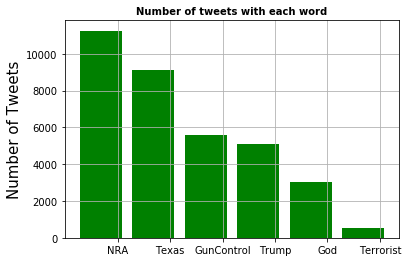

In [26]:
#Create a plot with the count of the tweets that contains each word
prg_langs = [ 'NRA', 'Texas', 'GunControl', 'Trump', 'God', 'Terrorist']
tweets_by_prg_lang = [gundata['NRA'].value_counts()[True], gundata['Texas'].value_counts()[True], gundata['GunControl'].value_counts()[True], gundata['Trump'].value_counts()[True], gundata['God'].value_counts()[True], gundata['Terrorist'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.8            
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of Tweets', fontsize=15)
ax.set_title('Number of tweets with each word', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

# PART 2: Sentiment Analysis in Twitter

In this part, we will clasify the tweets as positive, negative and neutral, following the code used in this website: https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-

[TextBlob](https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis) is a Python library for processing textual data, diving into common natural language processing (NLP) tasks such as sentiment analysis.
In the first part, the tweet is cleaned and then, the function `def analize_sentiment(tweet)` classifies the polarity. 

In [7]:
from textblob import TextBlob
import re

#clean the tweets by removing links and special characters
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

#classify the polarity (negative= -1, neutral=0 and positive=1) using textblob
def analize_sentiment(tweet):
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [8]:
# We create a column with the result of the analysis:
gundata['sentiment'] = np.array([ analize_sentiment(tweet) for tweet in gundata['tweet'] ])

# We display the updated dataframe with the new column:
gundata.head(5)

,tweet,id,date,screen_name,followers_count,followings_count,likes,language,location,Time,Date,sentiment
date,,,,,,,,,,,,
2017-11-01 11:30:56-05:00,RT @jstew0903: @ConservativeTht Outlaw gun fre...,925762088701693952,2017-11-01 16:30:56,jstew0903,10,14,0,en,None,16:30:56,2017-11-01,1
2017-11-01 11:30:56-05:00,RT @NatsinNY: Second Amendment: Sacrosanct\nSi...,925762088844308483,2017-11-01 16:30:56,lfsgd_diane,1918,3904,0,en,"San Antonio, Fl",16:30:56,2017-11-01,0
2017-11-01 11:30:57-05:00,RT @LibyaLiberty: The 2nd amendment is untouch...,925762094003380224,2017-11-01 16:30:57,ajhollywd,178,267,0,en,None,16:30:57,2017-11-01,1
2017-11-01 11:31:10-05:00,RT @NatsinNY: Second Amendment: Sacrosanct\nSi...,925762148785115136,2017-11-01 16:31:10,DarkInkPlctures,64,2269,0,en,"New York,NY",16:31:10,2017-11-01,0
2017-11-01 11:31:22-05:00,RT @LibyaLiberty: The 2nd amendment is untouch...,925762199896801280,2017-11-01 16:31:22,IndigenousInc,18,162,0,en,S. Scottsdale,16:31:22,2017-11-01,1


In [10]:
pos_tweets = [tweet for index, tweet in enumerate(gundata['tweet']) if gundata['sentiment'][index] == 1]
neu_tweets = [tweet for index, tweet in enumerate(gundata['tweet']) if gundata['sentiment'][index] == 0]
neg_tweets = [tweet for index, tweet in enumerate(gundata['tweet']) if gundata['sentiment'][index] == -1]

In [11]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(gundata['tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(gundata['tweet'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(gundata['tweet'])))

Percentage of positive tweets: 19.572701011073665%
Percentage of neutral tweets: 69.68403948001927%
Percentage de negative tweets: 10.743259508907078%


In [9]:
gundata['positive']=gundata['sentiment']==1
gundata['negative']=gundata['sentiment']==-1
gundata['neutral']=gundata['sentiment']==0

In [15]:
gundata.head()

,tweet,id,date,screen_name,followers_count,followings_count,likes,language,location,sentiment,positive,negative,neutral
0,RT @jstew0903: @ConservativeTht Outlaw gun fre...,925762088701693952,Wed Nov 01 16:30:56 +0000 2017,jstew0903,10,14,0,en,None,1,True,False,False
1,RT @NatsinNY: Second Amendment: Sacrosanct\nSi...,925762088844308483,Wed Nov 01 16:30:56 +0000 2017,lfsgd_diane,1918,3904,0,en,"San Antonio, Fl",0,False,False,True
2,RT @LibyaLiberty: The 2nd amendment is untouch...,925762094003380224,Wed Nov 01 16:30:57 +0000 2017,ajhollywd,178,267,0,en,None,1,True,False,False
3,RT @NatsinNY: Second Amendment: Sacrosanct\nSi...,925762148785115136,Wed Nov 01 16:31:10 +0000 2017,DarkInkPlctures,64,2269,0,en,"New York,NY",0,False,False,True
4,RT @LibyaLiberty: The 2nd amendment is untouch...,925762199896801280,Wed Nov 01 16:31:22 +0000 2017,IndigenousInc,18,162,0,en,S. Scottsdale,1,True,False,False


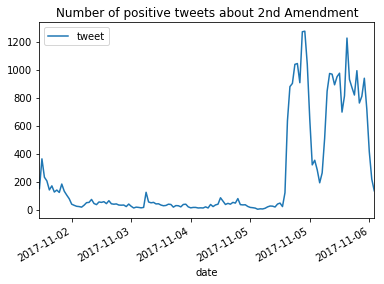

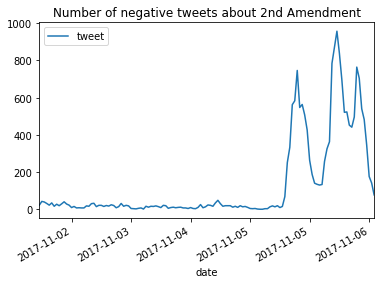

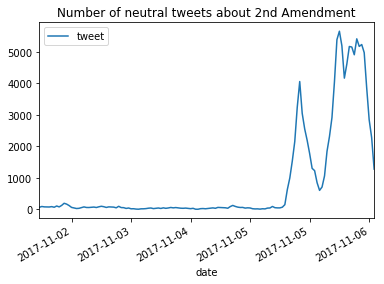

In [10]:
from numpy import *
import math
import matplotlib.pyplot as plt

positive = gundata[gundata['positive']==True].resample("1H").count().plot(y='tweet')
positive.set_title("Number of positive tweets about 2nd Amendment")

negative = gundata[gundata['negative']==True].resample("1H").count().plot(y='tweet')
negative.set_title("Number of negative tweets about 2nd Amendment")
                    
neutral = gundata[gundata['neutral']==True].resample("1H").count().plot(y='tweet')
neutral.set_title("Number of neutral tweets about 2nd Amendment")
                    
plt.show()

In [26]:
gundata['positive'].value_counts()[True]

32522

In [27]:
gundata['negative'].value_counts()[True]

17851

In [28]:
gundata['neutral'].value_counts()[True]

115787

Finally, using the library nltk and wordcloud, we will try to map the most common words 

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
import tweepy, json, random
from tweepy import OAuthHandler
from scipy.misc import imread

In [46]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [47]:
words=' '
count =0
f = open("twitter_stream_2a_sutherland.json", 'r')
for line in f:
    words= words + line
f.close

<function TextIOWrapper.close>

In [ ]:
## using wordcloud to generate the most common words

wordcloud = WordCloud(
    font_path='Xerox Sans Serif Wide Bold Oblique.ttf',
    background_color='black',
    max_words=500,
    width=1800,
    height=1400
).generate(words)

In [ ]:
plt.axis('off')
plt.savefig('./tweetcloud2.png', dpi=300)
plt.show()

# PART 3: Correlation between number of tweets and gun stocks

Different reports suggest that mass-shooting events have an effect in the stock market price of the most important gun companies. For example, after San Bernardino shooting (Dec, 2015), Pulse attack (August, 2016) and the Paris terror attacks (Nov, 2015) gun stocks spiked because people started to buy more guns either for defensive motives or for the fear of that stricter regulations will be established.

In this section we explore the behavior of the gun stock prices around the period of the mass shooting in Texas and Las Vegas. For this purpose, we will use the stock price of one of the most important gun companies in the US- RGR and we will try to find how the mass shooting impacted its stock's price. We will use the S&P500 index to find out if the stock prices are changing because the whole market is changing or because of something else.

It is important to note that we will only use graphical analysis to study this correlation. Our initial approach was to explore if the volume of tweets related to the Mass shooting in Texas was a determinant of the price of the stock RGR. However, we did not have enough hourly data on the stock's price (since the stock market trades only 7 hours a day) and we only had 2 days of tweets data after the shooting.

Before running the code, it is required to download:

```
pip install pandas-datareader
```


In [5]:
%matplotlib inline
import pandas as pd
import json, re
import datetime
import string
import pytz
import matplotlib
from matplotlib import pyplot as plt
from pandas_datareader import data
#in the terminal: pip install pandas-datareader

We download the price data from Yahoo Finance for 2017 for the Sturm Ruger stock  and the S&P500

In [6]:
# Define the tickers to download. We would like to see RGR and the S&P500 index.
tickers = ['RGR', '^GSPC']

# Define which online source to use
data_source = 'yahoo'

# Set the period of time: we want data for 2017
start_date = '2017-01-01'
end_date = '2017-11-28'

# pandas_reader.data.DataReader to load the data. 
panel_data = data.DataReader(tickers, data_source, start_date, end_date)
panel_data

# We only want the adjusted closing prices. It returns a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
stocks = panel_data.loc['Close']
stocks.tail()

,RGR,^GSPC
Date,,
2017-01-09,53.049999,2268.899902
2017-01-06,54.150002,2276.979980
2017-01-05,54.099998,2269.000000
2017-01-04,52.900002,2270.750000
2017-01-03,53.450001,2257.830078


In [7]:
type(stocks.index)
#prices = pd.DataFrame(close)
#prices.head()

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
%pylab inline
# Change the size of plots
pylab.rcParams['figure.figsize'] = (10, 5)

Populating the interactive namespace from numpy and matplotlib


We start by plotting the prices of RGR and SPX during 2017. 

We find that in general, the RGR stock price behaved like the market (SPX) but since the middle of july, this tendency changed.

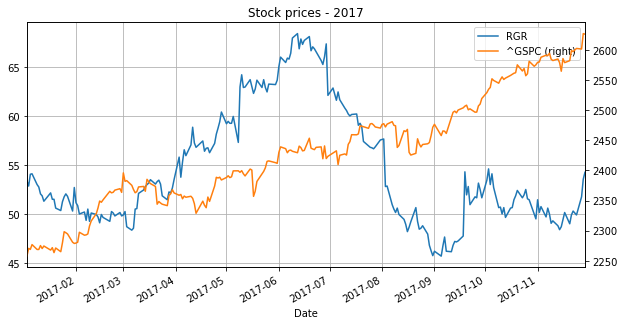

In [9]:
stocks.plot(secondary_y = ["^GSPC"], title = "Stock prices - 2017",grid = True)

In [10]:
#stocks.set_index('Date', inplace = True)
#stocks_nov = stocks[stocks.index > datetime.datetime(2017, 11, 1)]
#stocks_nov.head()

Plotting the prices only for the month of November we get the following graph

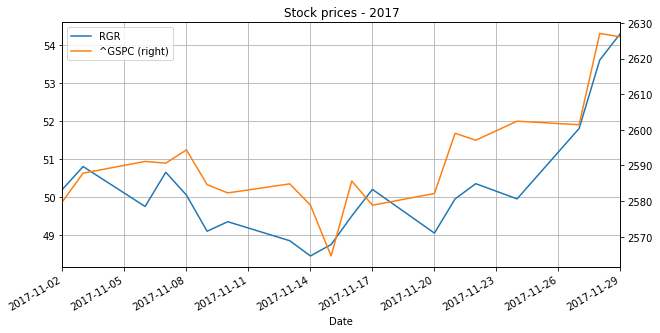

In [12]:
stocks[stocks.index > datetime.datetime(2017, 11, 1)].plot(secondary_y = ["^GSPC"], title = "Stock prices - 2017",grid = True)

Now, we would like to see graphically what happens with the price of RGR, 7 days before and after a shooting. 

For this purpose, we first explore the data of the shooting in Las Vegas on Oct 1st, 2017. The graph shows that after the shooting, the price of the stock increased significantly. However, we see that the market index increases as well in the same period. So this change is not necessarily a result of the shooting.

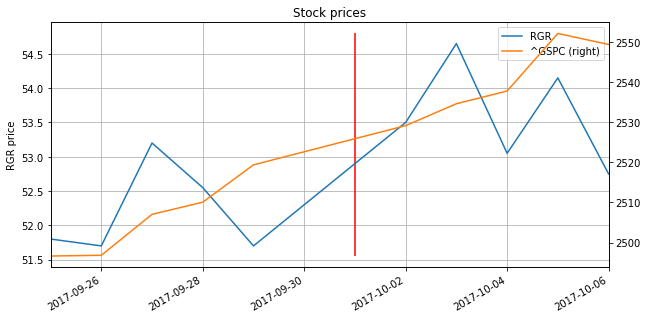

In [13]:
#RGR stock price before and after shootings: Vegas oct 1 2017
#We create a mask for the period
mask1 = (stocks.index >= datetime.datetime(2017, 9, 25)) & \
       (stocks.index <  datetime.datetime(2017, 10, 7))
plot2 = stocks.loc[mask1].plot(title = "Stock prices", secondary_y = ["^GSPC"], grid = True)
ymin, ymax = plot2.get_ylim()
plot2.vlines(x='2017-10-01', ymin=ymin, ymax=ymax,  color='r')
plot2.set_ylabel("RGR price")
plot2.set_xlabel("")

We want to see how the price changed after the shooting, so we create a new column with the difference of the prices before and after the shooting taking as a reference the last price before the shooting. We want to see the variation of the price taking as a reference the last price available before the shooting. 

In [14]:
#We create an index with the last price available before the shooting
date1 = datetime.datetime(2017, 9, 29)
index1 =stocks[stocks.index== date1]['RGR'][0]
stocks['Dif_vegas'] = (stocks['RGR'] - index1)/stocks['RGR']
stocks.head()

,RGR,^GSPC,Dif_vegas
Date,,,
2017-11-29,54.299999,2626.070068,0.047882
2017-11-28,53.599998,2627.040039,0.035448
2017-11-27,51.799999,2601.419922,0.001930
2017-11-24,49.950001,2602.419922,-0.035035
2017-11-22,50.349998,2597.080078,-0.026812


When we plot the percentual difference in the prices relative to the price on the date of the shooting, we see more clearly that after the shooting, the price of RGR increased by 3% on the next trading day and then another 2 percentage points on the second day.

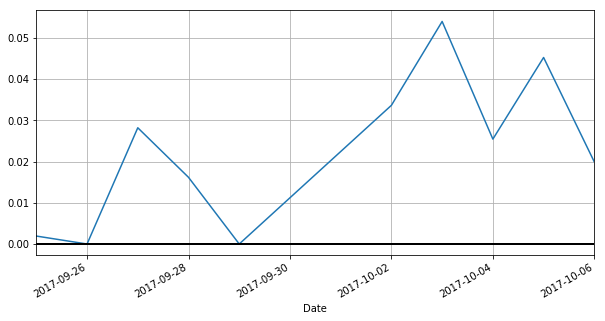

In [15]:
#RGR stock price for 2017
stocks.loc[mask1]['Dif_vegas'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)



We know replicate this analysis for our shooting of interest in Texas

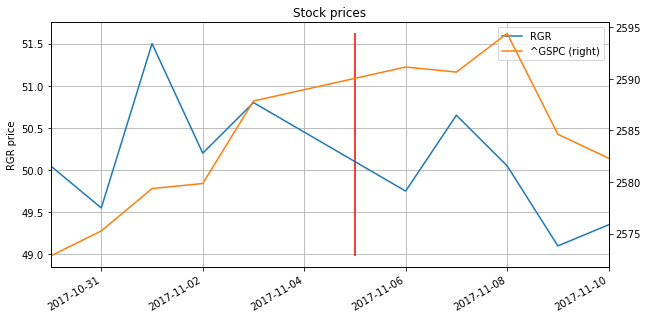

In [17]:
#RGR stock price before and after shootings: Texas nov 5 2017
mask2 = (stocks.index >= datetime.datetime(2017, 10, 30)) & \
       (stocks.index <  datetime.datetime(2017, 11, 13))
plot3 = stocks[['RGR', '^GSPC']].loc[mask2].plot(title = "Stock prices", secondary_y = ["^GSPC"], grid = True)
ymin, ymax = plot3.get_ylim()
plot3.vlines(x='2017-11-05', ymin=ymin, ymax=ymax,  color='r')
plot3.set_ylabel("RGR price")
plot3.set_xlabel("")

In [18]:
date = datetime.datetime(2017, 11, 3)
index2 =stocks[stocks.index== date]['RGR'][0]
#print(index)
stocks['Dif_Texas'] = (stocks['RGR'] - index2)/stocks['RGR']
stocks.head()

,RGR,^GSPC,Dif_vegas,Dif_Texas
Date,,,,
2017-11-29,54.299999,2626.070068,0.047882,0.064457
2017-11-28,53.599998,2627.040039,0.035448,0.052239
2017-11-27,51.799999,2601.419922,0.001930,0.019305
2017-11-24,49.950001,2602.419922,-0.035035,-0.017017
2017-11-22,50.349998,2597.080078,-0.026812,-0.008937


We can see that after the shooting in Texas (Nov 5th, 2017) the price of RGR decreased relative to the last price available before the shooting (Nov 3rd, 2017). As we saw in the graphs before, the price of RGR was also responding to the behavior of the market, in this period, the SP500 also decreased inmediately after the shooting.

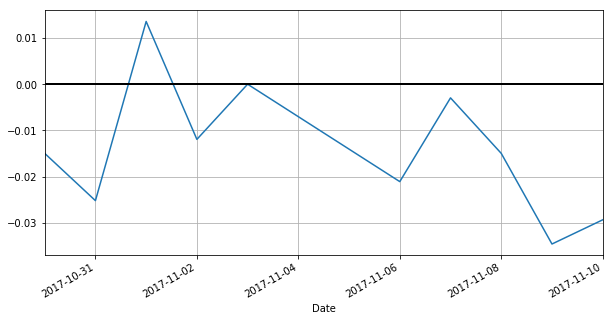

In [19]:
#RGR stock price for 2017
stocks.loc[mask2]['Dif_Texas'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)

Although we do not have a statistical model to explain the determinants on the behavior of the stock RGR, through our graphical analysis we find evidence that the stock price reacts to the context of the market rather than to an event of shooting. 

### END.